<a href="https://colab.research.google.com/github/jesolisp/Curso-Optimizacion/blob/main/codes/JESP_06_Busqueda_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritmo de búsqueda lineal

---

<ul>
    <li><strong>Autor:</strong> Jesús Emmanuel Solís Pérez </li>
    <li><strong>Contacto:</strong> <a href="mailto:jsolisp@unam.mx">jsolisp@unam.mx</a>
</ul>

---

# Propósito
El objetivo de este cuaderno es mostrar los fundamentos matemáticos para el algoritmo de búsqueda lineal.

# Preliminares matemáticos

## Búsqueda Lineal o Linear Search (LS)

El método de LS calcula en cada iteración una dirección $p_{k}$ para decir qué tan lejos debe moverse en esa dirección. La iteración está dada como sigue

\begin{equation}
 \label{eqn:ls_algorithm}
 x_{k+1} = x_{k} + \eta_{k}p_{k},
\end{equation}

donde el escalar $\eta_{k}>0$ es llamado **tamaño de paso**. Este método depende de la elección adecuada de la dirección $p_{k}$ y el paso $\eta_{k}$. La gran mayoría de los algoritmos de LS requieren que $p_{k}$ sea una **dirección de descenso**. Es decir, 

\begin{equation}
 p_{k}^{T} \nabla f_{k} <0,
\end{equation}

pues esta propiedad garantiza que la función $f$ sea reducida en esta dirección. Frecuentemente podemos encontrar en la literatura que la dirección de búsqueda para LS tiene la siguiente forma

\begin{equation}
 \label{eqn:bk1}
 p_{k} = -B_{k}^{-1}\nabla f_{k},
\end{equation}

donde $B_{k}$ es una matriz simétrica no singular.

**Observación.** Para el método de descenso, $B_{k} = I$ mientras que para el método de Newton $B_{k} = \nabla^{2} f(x_{k})$.

Cuando $p_{k}$ está dada por \eqref{eqn:bk1} y $B_{k}$ es definida positiva, tenemos

\begin{equation}
 p_{k}^{T} \nabla f_{k} = -\nabla f_{k}^{T} B_{k}^{-1} \nabla f_{k} < 0,
\end{equation}

por lo tanto, $p_{k}^{T} \nabla f_{k} <0$.

**Tamaño de paso**
La elección del parámetro $\eta_{k}$ es de vital importancia ya que de ello depende llegar al mínimo de $f$. Una forma de elegir este parámetro es considerando el minimizador global univariante definido como sigue

\begin{equation}
 \phi(\eta) = f(x_{k} + \eta p_{k}), \quad \eta > 0.
\end{equation}

No obstante, en la práctica es muy complicado hacer la elección de $\eta$ ya que se requiere hacer evaluaciones de la función objetivo $f$ y en algunas ocasiones de $\nabla f$. Los algoritmos LS prueban una secuencia de posibles valores para $\eta$ aceptando sólo aquel que cumple ciertas condiciones. Por lo tanto, LS se divide en dos etapas:

1. Encontrar un intervalo que contiene paso deseables.
2. Una bisección o fase de interpolación para calcular un paso dentro de este intervalo.

## Condiciones de Wolfe
Una condición de LS inexacta estipula que $\eta_{k}$ debe dar una **disminución suficiente** en la función objetivo $f$ dada por la siguiente desigualdad

\begin{equation}
 \label{eqn:armijo_condition}
 f(x_{k} + \eta p_{k}) \leq f(x_{k}) + c_{1} \eta \nabla f_{k}^{T} p_{k},
\end{equation}

para alguna constante $c_{1} \in (0,1)$. Esto implica que la minimización de $f$ debe ser proporcional al tamaño del paso $\eta_{k}$ y a la dirección de la derivada $\nabla f_{k}^{T} p_{k}$. La desigualdad dada en \eqref{eqn:armijo_condition} es conocida como **condición de Armijo**.

El lado derecho de la Ec. \eqref{eqn:armijo_condition} es una función lineal denotada como $l(\alpha)$. La función $l(\cdot)$ tiene una pendiente negativa $c_{1}\nabla f_{k}^{T} p_{k}$ debido a que $c_{1}\in(0,1)$.

**Observación.** En la práctica, $c_{1}$ suele tener un valor muy pequeño, por ejemplo $c_{1} = 1\times 10^{-4}$.

Para evitar pasos cortos, la **condición de curvatura** requiere que $\eta_{k}$ satisfaga

\begin{equation}
 \label{eqn:curvature_condition}
 \nabla f\left( x_{k} + \eta_{k}p_{k} \right)^{T} p_{k} \geq c_{2} \nabla f_{k}^{T}p_{k},
\end{equation}

para alguna constante $c_{2} \in (c_{1},1)$. El lado izquierdo de \eqref{eqn:curvature_condition} es la derivada $\dot{\varphi}(\eta_{k})$, por lo que la condición de curvatura asegura que la pendiente de $\varphi$ en $\eta_{k}$ sea mayor que $c_{2}$ veces la pendiente inicial $\varphi(0)$.

Por otro lado, si $\varphi(\eta_{k})$ es ligeramente negativo o incluso positivo, no podemos minimizar $f$ en esta dirección y es necesario terminar el algoritmo de búsqueda lineal.

**Observación.** Los valores típicos para $c_{2}$ son $0.9$ cuando la dirección $p_{k}$ se escoge mediante el método de Newton o cuasi-Newton; 0.1 cuando $p_{k}$ se obtiene por un método de gradiente conjugado no lineal.

## Condiciones de Goldstein
Las condiciones de Goldstein aseguran que el tamaño de paso $\eta$ logre minimizar. Suele expresarse como un conjunto de desigualdades como se muestra a continuación

\begin{equation}
 f(x_{k}) + (1-c)\eta_{k}\nabla f_{k}^{T} p_{k} \leq f(x_{k} + \eta_{k}p_{k}) \leq f(x_{k}) + c\eta_{k}\nabla f_{k}^{T}p_{k},
\end{equation}

con $0 < c < 1/2$.

**Observación.**  La segunda desigualdad es la condición para minimizar \eqref{eqn:armijo_condition}, mientras que la primera desigualdad se introduce para controlar el tamaño de paso.

## Backtracking Line Search (BLS)

Si el algoritmo LS escoge los tamaños de paso adecuandos, mediante el enfoque llamado backtracking, podemos prescindir una de las restricciones de Wolf y usar solo la condición de minimización para terminar el procedimiento de LS. Este enfoque, se resume en el siguiente algoritmo

**Algoritmo 1. Backtracking Line Search (BLS)**
1. Escoger $\bar{\eta}>0$, $\rho \in (0,1)$, $c\in(0,1)$.
2. Inicializar $\eta \leftarrow \bar{\eta}_{k}$.
3. **while(**  $f(x_{k} + \eta p_{k}) \leq f(x_{k}) + c\eta \nabla f_{k}^{T}p_{k}$ **)**

    $\eta \leftarrow \rho \eta$

4. Retornar $\eta_{k} = \eta$.

**Observación.** El tamaño de paso inicial $\bar{\eta}$ se escoge 1 para los métodos de Newton y cuasi-Newton. No obstante, puede tener valores diferentes en otros algoritmos. Por ejemplo, para  descenso pronunciado o el gradiente conjugado. 

En la práctica, se busca que el factor de contracción $\rho$ varíe en cada iteración. Por ello, se escoge $\rho \in (\rho_{lo},\rho_{hi})$ para $0 <\rho_{lo}<\rho_{hi}<1$.

## Método de Fletcher-Reeves
Fletcher y Reeves [1] extendieron el método de gradiente conjugado para funciones no lineales. Para ello consideran que $\eta_{k}$ se busca mediante LS para encontrar el mínimo de la función no lineal $f$ en dirección de $p_{k}$. De este modo, el algoritmo dado en la \eqref{eqn:ls_algorithm} se convierte en un algoritmo de optimización no lineal como se muestra a continuación

\begin{equation}
 p_{k+1} \leftarrow -\nabla f_{k+1} + \beta_{k+1}^{FR} \cdot p_{k},
\end{equation}

donde $\beta_{k+1}^{FR}$ denota el parámetro de Fletcher-Reeves dado como sigue

\begin{equation}
 \beta_{k+1}^{FR} :=  \left( \frac{\| \nabla f_{k} \|}{\|\nabla f_{k-1}\|} \right)^{2}.
\end{equation}

# Configuración
Importamos todas las librerías necesarias para poder trabajar

In [ ]:
# Data manipulation
import numpy as np

# Visualizations
import matplotlib.pyplot as plt
from matplotlib import cm
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100
plt.rcParams['text.usetex'] = True
plt.rcParams["font.family"] = "serif"
plt.rc('axes', titlesize=20)        # Controls Axes Title
plt.rc('axes', labelsize=20)        # Controls Axes Labels
plt.rc('xtick', labelsize=20)       # Controls x Tick Labels
plt.rc('ytick', labelsize=20)       # Controls y Tick Labels
plt.rc('legend', fontsize=15)       # Controls Legend Font
plt.rc('figure', titlesize=15)      # Controls Figure Title
%matplotlib inline

# Autoreload extension
if 'autoreload' not in get_ipython().extension_manager.loaded:
    %load_ext autoreload
    
%autoreload 2

# Definición de funciones
Definimos todas las funciones que comprenden el método LS. Considerando la función que verifica que el valor de $\eta_{k}$ cumple con la condición de Armijo.

In [ ]:
def armijo(eta,x,p,f0,f1,c1=1e-4,rho=0.5):
    """
    Función que verifica si el tamaño de paso satisface la condición de Armijo
    f(x+eta*p)<=f(x)+c1*eta*gradient(f(x))*p

    Parameters
    ----------
    eta : 1*1
        Tamaño de paso actual.
    x : (N*1)
        Iteración actual.
    p : (N*1)
        Dirección de búsqueda.
    f0 : (RN->R)
        Función objetivo.
    f1 : (RN->RN)
        Gradiente de la función.
    c1 : (1*1)
        Constante proporcionada por el usuario en el rango [0,0.5].
    rho : (1*1)
        Constante proporcionada por el usuario en el rango [0,1].

    Retorna
    -------
    valor de eta si la condición se cumple.

    """
    
    j = 1
    while (j>0):
        x_new = x + eta*p;
        if (f0(x_new)<=f0(x)+c1*eta*np.vdot(f1(x),p)):
            j = 0
            eta_armijo = eta
        else:
            eta = eta*rho

    return eta_armijo

In [ ]:
def linear_search(X0, F, gradF, tol=1e-4,delta_rest = 0.8, c1 = 1e-4, rho = 0.2):
    """
    Parameters
    ----------
    X0 : (2*1)
        Puntos iniciales.
    F : (lambda function)
        Función objetivo.
    gradF : (lambda function)
        Gradiente de la función objetivo.
    tol : (float64), optional
        Tolerancia del método de LS. The default is 1e-4.
    delta_rest : (float64), optional
        Evalúa para reiniciar el algoritmo. The default is 0.8.
    c1 : (float64), optional
        Constante definida por el usuario. Condición de Armijo. The default is 1e-4.
    rho : (float64), optional
        Constante definida por el usuario. Condición de Armijo. The default is 0.2.

    Retorna
    -------
    X0 : (2,1)
        Valor óptimo de la función.
    F(X): (2,1)
        Función evaluada en el valor mínimo X0.
    Xit : (k,1)
        Vector de trayectorias de X.
    """
    
    X = X0
    Xit = X.T
    k = 0
    beta = 0
    
    gradF_X0 = gradF(X0)
    
    while (np.linalg.norm(gradF_X0)>tol):
        # Dirección
        if (k==0):
              p = -gradF_X0 # Ec. (3) con B = I
        else:
              p = -gradF_X0 + beta*p # Ec. (9)
        
        # Condición de Armijo
        eta_guess = 0.5*np.abs(np.vdot(gradF_X0,p))/(np.linalg.norm(p))**2 # Tamaño de paso propuesto
        eta = armijo(eta_guess,X0,p,F,gradF) # Evaluación del tamaño de paso bajo la condición de Armijo

        # Nuevo punto
        Xnew = X0 + eta*p # Ec. (1)
        gradF_Xnew = gradF(Xnew)

        # Expresión Fletcher-Reeves
        beta = (np.linalg.norm(gradF_Xnew)/np.linalg.norm(gradF_X0))**2 # Ec. (10)
      
        # Prueba para reinicar
        test = np.abs(np.vdot(gradF_Xnew,gradF_X0))>delta_rest*(F(X0))**2
        
        if (test):
            k = 0
        else:
            k += 1
            
        # Actualiza y almacena el valor 
        X0 = Xnew
        gradF_X0 = gradF_Xnew
        Xitbis = np.concatenate((Xit,Xnew.T))
        Xit = Xitbis
    
    # Solución
    return X0, F(X0), Xit

# Caso I. Función de dos variables

Sea la función

\begin{equation}
  f\left(x_{1},x_{2}\right) = \left(x_{1} - 2\right)^{4} + x_{2}^{2}\left(x_{1} - 2\right)^{2} + \left(x_{2} + 1\right)^{2},
\end{equation}

encuentre los valores mínimos utilizando el algoritmo de LS.

In [ ]:
X0 = np.array([[7],[8]]) # Puntos iniciales
#X0 = np.array([[np.random.rand()],[np.random.rand()]])
    
tol = 1e-6; # Tolerancia del algoritmo
delta_rest = 0.8 # En el rango de [0,1] para reiniciar
c1 = 1e-4 # en el rango de [1e-4,1e-3] para Armijo (opcional)
rho = 0.2 # en el rango de [0.1,0.5] para Armijo (opcional)
    
# Función objetivo
F = lambda x: (x[0] - 2)**4 + x[1]**2*(x[0] - 2)**2 + (x[1] + 1)**2
gradF = lambda x: np.array([4*(x[0] - 2)**3 + x[1]**2*(2*x[0] - 4),2*x[1] + 2*x[1]*(x[0] - 2)**2 + 2])
    
Xmin, Fmin, xk = linear_search(X0, F, gradF, tol, c1, rho)


## Graficación de resultados

In [ ]:
xmin = -10 # coordenada mínima
xmax =  10 # coordenada máxima
dx = 0.5 # distancia entre coordenadas consecutivas

dom = np.arange(xmin,xmax,dx)
X,Y = np.meshgrid(dom,dom)
F = lambda x1,x2: (x1 - 2)**4 + x2**2*(x1 - 2)**2 + (x2 + 1)**2

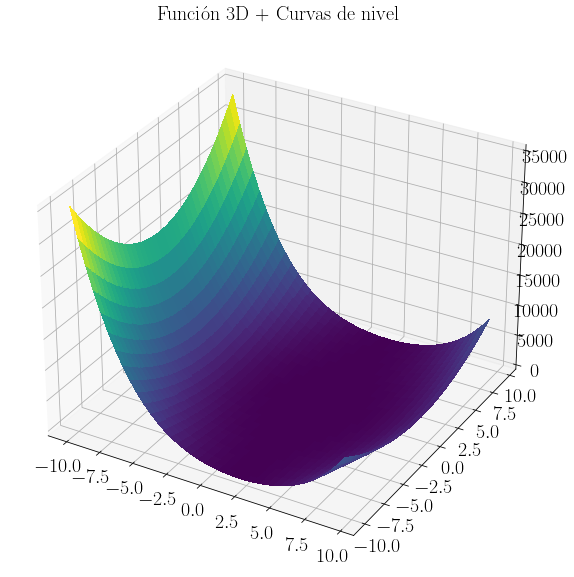

In [ ]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(15,10))
surf = ax.plot_surface(X, Y, F(X,Y), cmap=cm.viridis,linewidth=0, antialiased=False)
plt.title('Función 3D + Curvas de nivel')
plt.show()

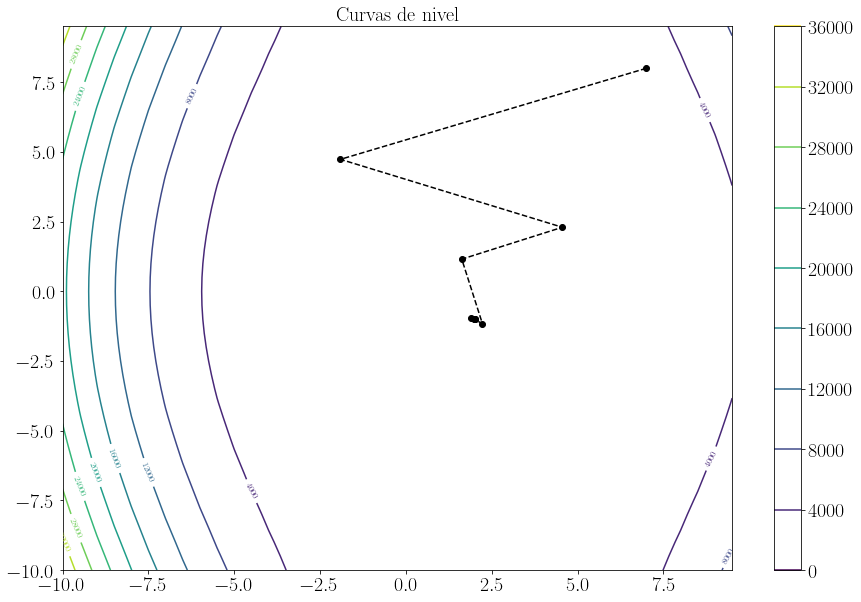

In [ ]:
plt.figure(figsize=(15,10));
contours = plt.contour(X, Y, F(X,Y), 10)
plt.clabel(contours, inline=True, fontsize=8)
plt.colorbar()
plt.plot(xk[:,0], xk[:,1],'o--k')
plt.title('Curvas de nivel')
plt.show()

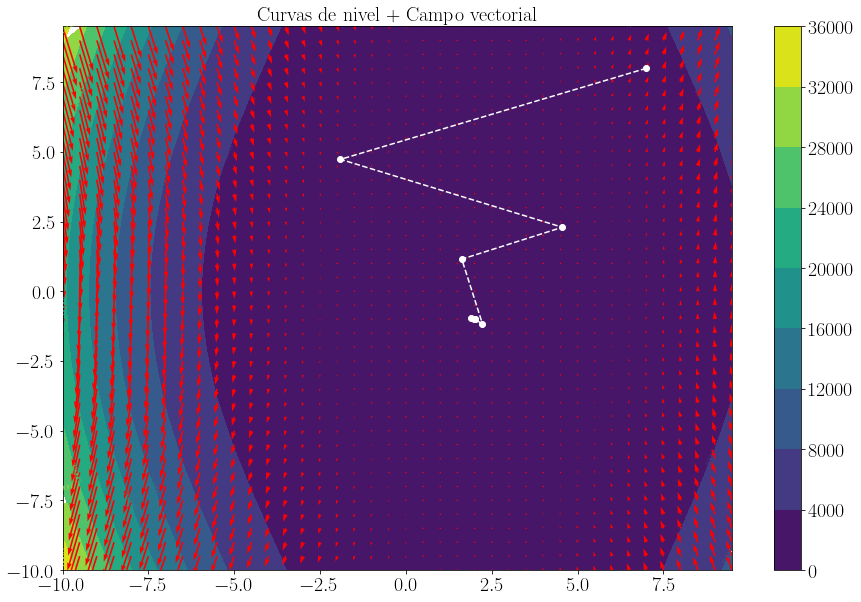

In [ ]:
plt.figure(figsize=(15,10))
gradx,grady = np.gradient(F(X,Y),dx)
contours = plt.contourf(X,Y,F(X,Y), 10)
plt.clabel(contours, inline=True, fontsize=8)
plt.colorbar()
plt.plot(xk[:,0], xk[:,1],'o--w')
plt.quiver(X,Y,gradx,grady, color = 'red')
plt.title('Curvas de nivel + Campo vectorial')
plt.show()

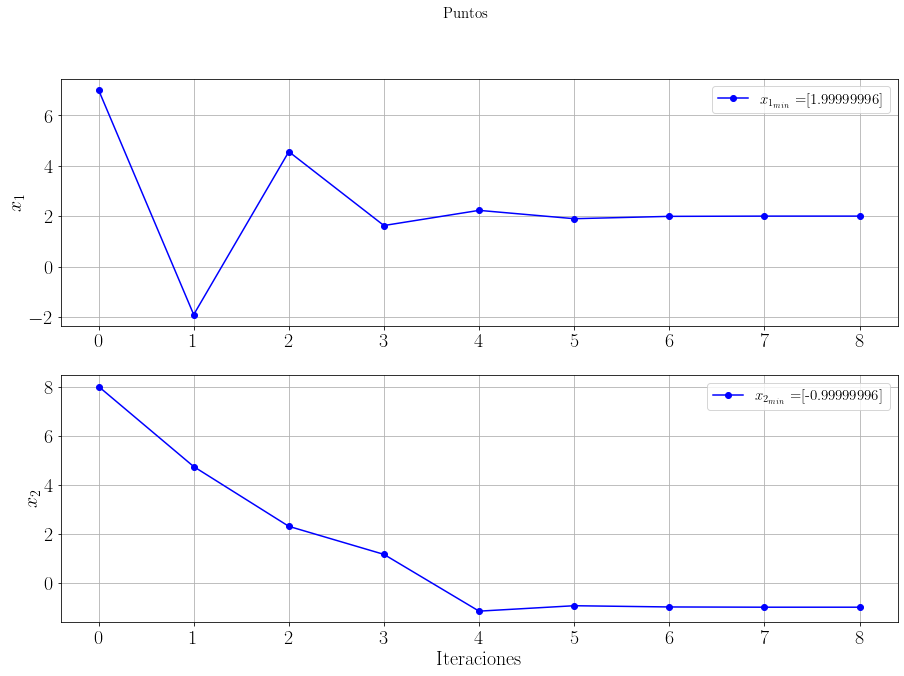

In [ ]:
iterations = np.arange(0,len(xk))
       
fig, axs = plt.subplots(2,figsize=(15,10))
fig.suptitle('Puntos')
axs[0].plot(iterations,xk[:,0],'o-b', label = '$x_{1_{min}} =$'+str(Xmin[0]))
axs[0].grid('on')
axs[0].set_ylabel('$x_{1}$')
axs[0].legend()

axs[1].plot(iterations,xk[:,1],'o-b', label = '$x_{2_{min}} =$'+str(Xmin[1]))
axs[1].grid('on')
axs[1].set_ylabel('$x_{2}$')
axs[1].set_xlabel('Iteraciones')
axs[1].legend()
plt.show()

# Caso II. Función Booth
La función Booth está definida por

\begin{equation}
 f\left(x_{1} , x_{2}\right) = \left(x_{1} + 2x_{2} − 7\right)^{2} + \left(2x_{1} + x_{2} − 5\right)^{2}.
\end{equation}

Utilice el método de LS para minimizar la función de Booth considerando que el espacio de búsqueda está dado por $x_{i} \in [-10,10] \forall i=1,2$. Además, considere como punto inicial

\begin{equation}
 x_{0} = \begin{bmatrix} 10 & 0 \end{bmatrix}^{T}.
\end{equation}

In [ ]:
X0 = np.array([[10],[0]]) # Puntos iniciales
#X0 = np.array([[np.random.rand()],[np.random.rand()]])
    
tol = 1e-6; # Tolerancia del algoritmo
delta_rest = 0.8 # En el rango de [0,1] para reiniciar
c1 = 1e-4 # en el rango de [1e-4,1e-3] para Armijo (opcional)
rho = 0.2 # en el rango de [0.1,0.5] para Armijo (opcional)
    
# Función objetivo
F = lambda x: np.power((x[0] + 2*x[1] - 7),2) + np.power((2*x[0] + x[1] - 5),2)
gradF = lambda x: np.array([8*x[1] + 10*x[0] - 34,10*x[1] + 8*x[0] - 38])
    
Xmin, Fmin, xk = linear_search(X0, F, gradF, tol, c1, rho)

## Graficación de resultados

In [ ]:
xmin = -10 # coordenada mínima
xmax =  10 # coordenada máxima
dx = 0.5 # distancia entre coordenadas consecutivas

dom = np.arange(xmin,xmax,dx)
X,Y = np.meshgrid(dom,dom)
F = lambda x1,x2:  (x1 + 2*x2 - 7)**2 + (2*x1 + x2 - 5)**2

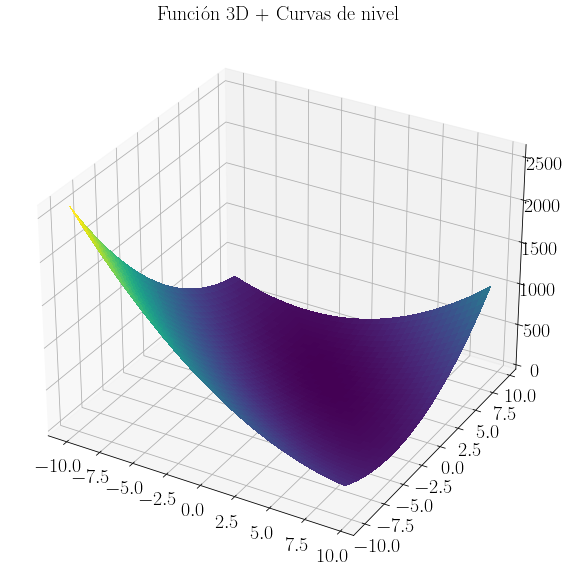

In [ ]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(15,10))
surf = ax.plot_surface(X, Y, F(X,Y), cmap=cm.viridis,linewidth=0, antialiased=False)
plt.title('Función 3D + Curvas de nivel')
plt.show()

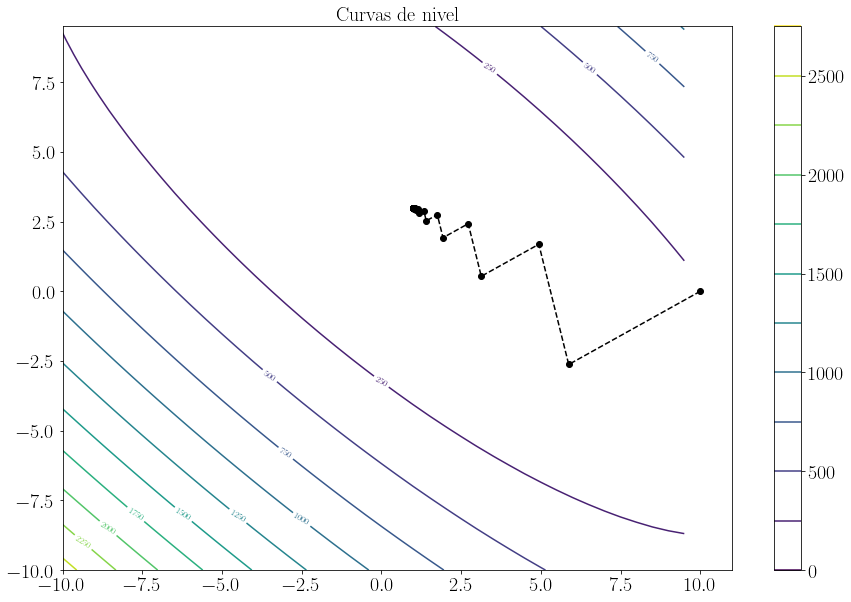

In [ ]:
plt.figure(figsize=(15,10));
contours = plt.contour(X, Y, F(X,Y), 10)
plt.clabel(contours, inline=True, fontsize=8)
plt.colorbar()
plt.plot(xk[:,0], xk[:,1],'o--k')
plt.title('Curvas de nivel')
plt.show()

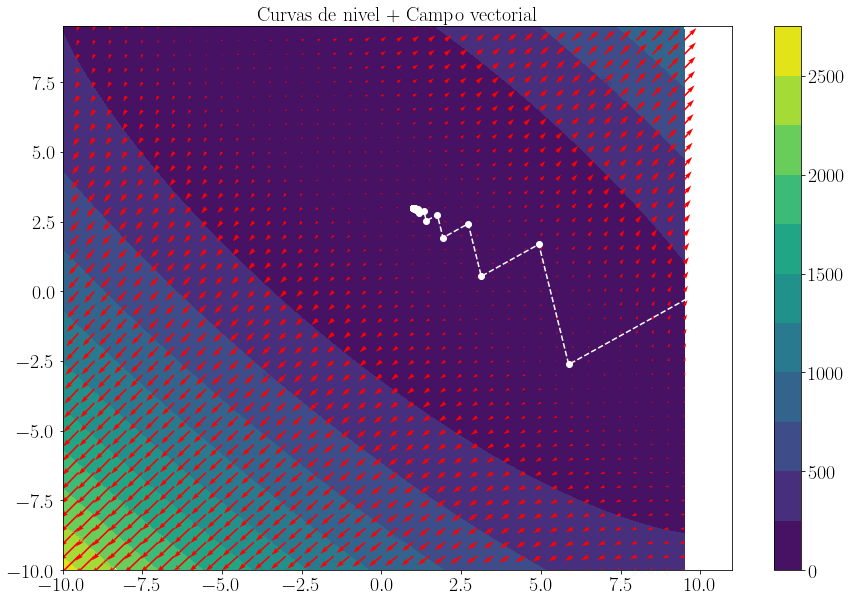

In [ ]:
plt.figure(figsize=(15,10))
gradx,grady = np.gradient(F(X,Y),dx)
contours = plt.contourf(X,Y,F(X,Y), 10)
plt.clabel(contours, inline=True, fontsize=8)
plt.colorbar()
plt.plot(xk[:,0], xk[:,1],'o--w')
plt.quiver(X,Y,gradx,grady, color = 'red')
plt.title('Curvas de nivel + Campo vectorial')
plt.show()

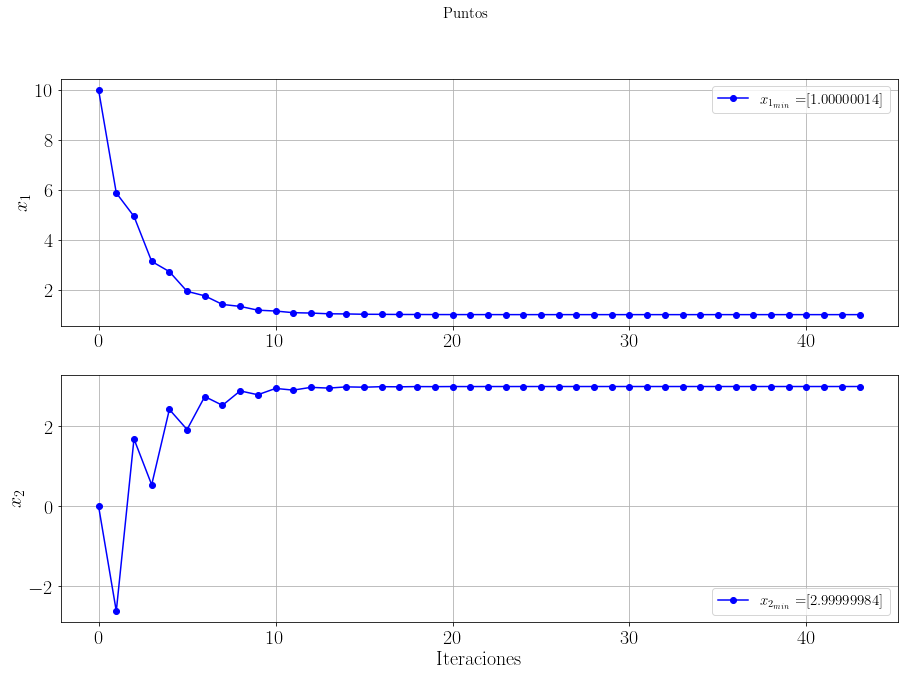

In [ ]:
iterations = np.arange(0,len(xk))
       
fig, axs = plt.subplots(2,figsize=(15,10))
fig.suptitle('Puntos')
axs[0].plot(iterations,xk[:,0],'o-b', label = '$x_{1_{min}} =$'+str(Xmin[0]))
axs[0].grid('on')
axs[0].set_ylabel('$x_{1}$')
axs[0].legend()

axs[1].plot(iterations,xk[:,1],'o-b', label = '$x_{2_{min}} =$'+str(Xmin[1]))
axs[1].grid('on')
axs[1].set_ylabel('$x_{2}$')
axs[1].set_xlabel('Iteraciones')
axs[1].legend()
plt.show()

Por lo tanto, el mínimo global de la función de Booth es $x^{\star} = \begin{bmatrix} 1 & 3 \end{bmatrix} $.

# Caso III. Función de Matyas
La función de Matyas está definida por

\begin{equation}
 f\left(x_{1},x_{2}\right) = 0.26\left(x_{1}^{2} + x_{2}^{2}\right)- 0.48x_{1}x_{2}.
\end{equation}

Utilice el método de LS para minimizar la función de Booth considerando que el espacio de búsqueda está dado por $x_{i} \in [-10,10] \forall i=1,2$. Además, considere como punto inicial

\begin{equation}
 x_{0} = \begin{bmatrix} 5 & -5 \end{bmatrix}^{T}.
\end{equation}

In [ ]:
X0 = np.array([[5],[-5]]) # Puntos iniciales
#X0 = np.array([[np.random.rand()],[np.random.rand()]])
    
tol = 1e-6; # Tolerancia del algoritmo
delta_rest = 0.8 # En el rango de [0,1] para reiniciar
c1 = 1e-4 # en el rango de [1e-4,1e-3] para Armijo (opcional)
rho = 0.2 # en el rango de [0.1,0.5] para Armijo (opcional)
    
# Función objetivo
F = lambda x: 0.26*(x[0]**2+x[1]**2)-0.48*x[0]*x[1]
gradF = lambda x: np.array([-(12*x[1]-13*x[0])/25,
                                                           (13*x[1]-12*x[0])/25])
    
Xmin, Fmin, xk = linear_search(X0, F, gradF, tol, c1, rho)

## Graficación de resultados

In [ ]:
xmin = -10 # coordenada mínima
xmax =  10 # coordenada máxima
dx = 0.5 # distancia entre coordenadas consecutivas

dom = np.arange(xmin,xmax,dx)
X,Y = np.meshgrid(dom,dom)
F = lambda x1,x2: (x1 - 2)**4 + x2**2*(x1 - 2)**2 + (x2 + 1)**2

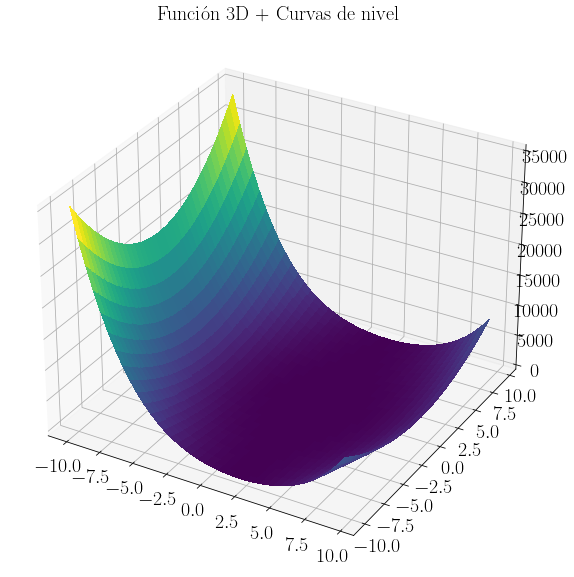

In [ ]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(15,10))
surf = ax.plot_surface(X, Y, F(X,Y), cmap=cm.viridis,linewidth=0, antialiased=False)
plt.title('Función 3D + Curvas de nivel')
plt.show()

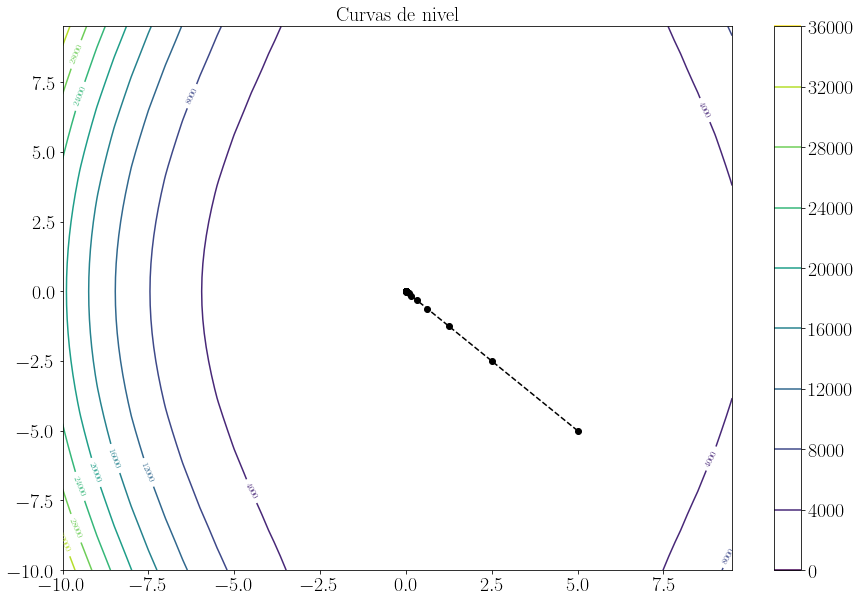

In [ ]:
plt.figure(figsize=(15,10));
contours = plt.contour(X, Y, F(X,Y), 10)
plt.clabel(contours, inline=True, fontsize=8)
plt.colorbar()
plt.plot(xk[:,0], xk[:,1],'o--k')
plt.title('Curvas de nivel')
plt.show()

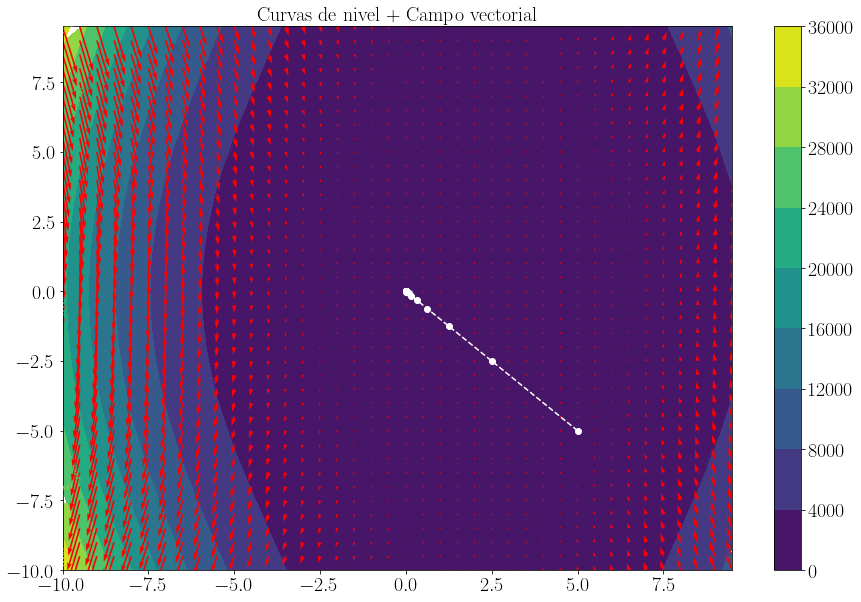

In [ ]:
plt.figure(figsize=(15,10))
gradx,grady = np.gradient(F(X,Y),dx)
contours = plt.contourf(X,Y,F(X,Y), 10)
plt.clabel(contours, inline=True, fontsize=8)
plt.colorbar()
plt.plot(xk[:,0], xk[:,1],'o--w')
plt.quiver(X,Y,gradx,grady, color = 'red')
plt.title('Curvas de nivel + Campo vectorial')
plt.show()

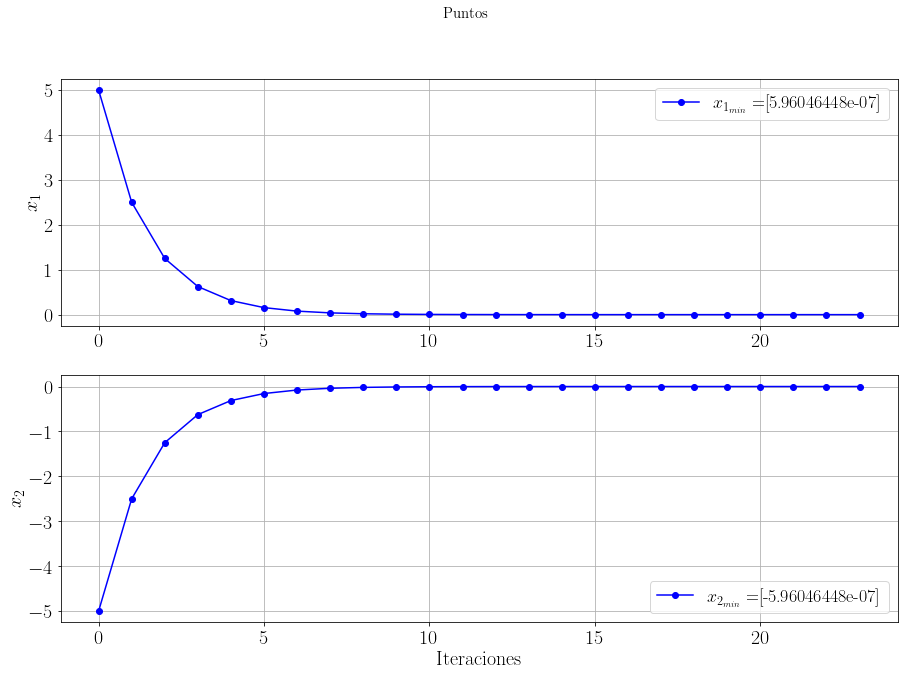

In [ ]:
iterations = np.arange(0,len(xk))
       
fig, axs = plt.subplots(2,figsize=(15,10))
fig.suptitle('Puntos')
axs[0].plot(iterations,xk[:,0],'o-b', label = '$x_{1_{min}} =$'+str(Xmin[0]))
axs[0].grid('on')
axs[0].set_ylabel('$x_{1}$')
axs[0].legend(fontsize=18)

axs[1].plot(iterations,xk[:,1],'o-b', label = '$x_{2_{min}} =$'+str(Xmin[1]))
axs[1].grid('on')
axs[1].set_ylabel('$x_{2}$')
axs[1].set_xlabel('Iteraciones')
axs[1].legend(fontsize=18)
plt.show()

# Caso IV. Función de Beale
La función de Beale está definida por

\begin{equation}
 f\left(x_{1},x_{2}\right) = \left(1.5 - x_{1} + x_{1}x_{2}\right)^{2} + \left(2.25 - x_{1} + x_{1}x_{2}^{2}\right)^{2} + \left(2.62 - x_{1} + x_{1}x_{2}^{3}\right)^{2}.
\end{equation}

Utilice el método de LS para minimizar la función de Booth considerando que el espacio de búsqueda está dado por $x_{i} \in [-4.5,4.5] \forall i=1,2$. Además, considere como punto inicial

\begin{equation}
 x_{0} = \begin{bmatrix} -3 & 3 \end{bmatrix}^{T}.
\end{equation}

# Referencias
[1] Fletcher, Reeves, and Colin M. Reeves. "Function minimization by conjugate gradients." *The computer journal* 7.2 (1964): 149-154.

[2] Ernesto, R. W., Ernesto, L. G., Rafael, B., & Yolanda, G. G. (2016). Perfiles de comportamiento numérico de los métodos de búsqueda immune network algorithm y bacterial foraging optimization algorithm en funciones benchmark. *Ingeniería, investigación y tecnología*, 17(4), 479-490.